### Imports

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt

In [14]:
%matplotlib inline
import matplotlib as mpl

In [58]:
mpl.use('agg')

### Lendo CSV e obtendo contagem de tweets por usuário

In [3]:
tweets = pd.read_csv('tweets.csv')

In [4]:
tweets['count'] = 1

In [5]:
tweets = tweets.groupby('screen_name').sum().sort_values(by='count', ascending = False)

In [6]:
tweets = tweets['count']

### Salvando CSV

In [7]:
tweets.to_csv('tweet_count.csv', index=True)

In [83]:
tweets = pd.read_csv('tweet_count.csv')

## Identificando número de usuários

In [84]:
len(tweets)

23368

## Identificando usuários que tweetam anormalmente

In [87]:
freq = tweets['count'].to_numpy() # Obtendo array com o número de tweets

#### Criando boxplot com o número de tweets

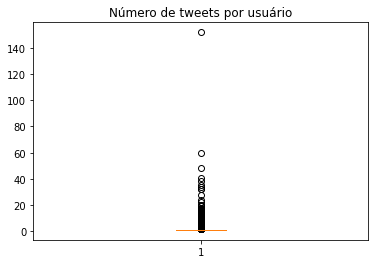

In [88]:
plt.boxplot(freq)
plt.title('Número de tweets por usuário')
plt.show()

### Função que remove outliers de um array NumPy

In [89]:
def remove_outliers(array, m=80): # Quanto maior o M, mais permissiva é a remoção
    return [array[abs(array - np.mean(array)) < m * np.std(array)]][0]

### Removendo outliers

In [90]:
freq_clean = remove_outliers(freq)

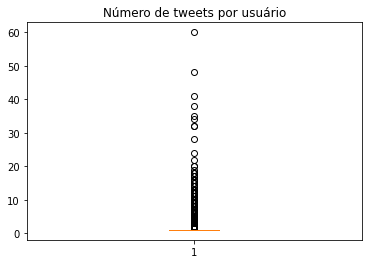

In [91]:
plt.boxplot(freq_clean)
plt.title('Número de tweets por usuário')
plt.show()

### Removendo outliers no DataFrame

In [118]:
for i in range(len(tweets)):
    if tweets['count'][i] not in freq_clean:
        tweets = tweets.drop(i)